# Why or when you could use a single layer nn

- only when it strict linear seperable!
- lower risk of overfitting
- more efficient
Definition: A set of associations is strict linear seperable, if there exists a hyperplane such that all points of one class lie on one side of the hyperplane and all points of the other class lie on the opposite side, with no points lying exactly on the hyperplane
for higher dimensions there are seperation algorithm for example support vector machines(SVM).  
in this case i took the example of this website: https://www.geeksforgeeks.org/machine-learning/visualizing-support-vector-machines-svm-using-python/
todo: implement the SVM only with numpy!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
#Load the iris datasets
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [2]:
#Simple SVM from scratch
#what i need: function SVM, fit and predict option and __init__

class SVM():
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                y_i = y[idx]
                condition = y_i * (np.dot(x_i, self.w) + self.b) < 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - y_i * x_i)
                    self.b += self.lr * y_i
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)

    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        return np.sign(linear_output)

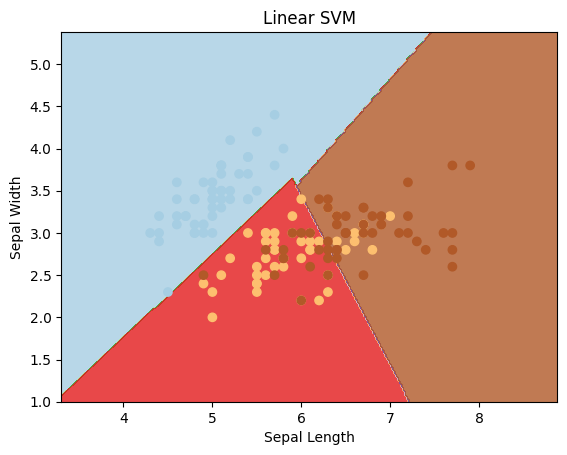

In [ ]:
#pre built svm model
clf_linear = SVC(kernel = 'linear')
#clf_linear = SVM()
clf_linear.fit(X, y)
#now visualize:
# Create a mesh to plot decision boundaries
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
                     
# Plot decision boundary of Linear SVM
Z_linear = clf_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)
plt.contourf(xx, yy, Z_linear, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('Linear SVM')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

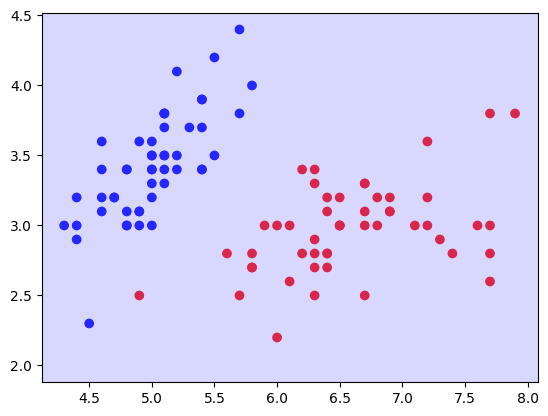

In [4]:
#from scratch build svm model:
model = SVM()
model.fit(X,y)

def plot_decision_boundary(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = model.predict(xy).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.show()

plot_decision_boundary(X, y, model )